# **Amazon Movie Rating Prediction**

---

This project investigates the relationship between star ratings and user reviews on Amazon Movie Reviews by leveraging various features. The dataset features include:

- Unique identifiers for products and users
- Count of users who marked a review as helpful
- Timestamp for each review
- Brief summary and full text of the review

### Objective

The primary goal is to predict the star rating score based on these features. A successful model could potentially estimate the popularity of unlisted movies and improve recommendation systems by understanding patterns in user feedback and ratings.

[Competition Link](http://www.kaggle.com/c/bu-cs506-fall-2024-midterm)


## Import libraries

In [6]:
import missingno as msno 
import scipy
from scipy.sparse import hstack
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
import warnings

warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error


## Import train data

In [7]:
data = pd.read_csv('data/train.csv')

## Exploratory Data Analysis (EDA)
Exploring the data to uncover valuable patterns and insights is our next step. Let’s see what trends and relationships emerge as we get to know our data better!


In [4]:
data.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score
0,914403,B0009W5KHM,AV6QDP8Q0ONK4,2,2,1341014400,GOOD FUN FILM,While most straight to DVD films are not worth...,5.0
1,354887,6303079709,A2I8RXJN80A2D2,0,0,1168819200,Movie Review,"I have wanted this one for sometime, also. I ...",5.0
2,1407653,B004H0M2XC,A3FHV3RV8Z12E6,0,0,1386201600,When is it a good time to Consent?,Actually this was a pretty darn good indie fil...,4.0
3,1377458,B003ZJ9536,A12VLTA3ZHVPUY,1,1,1348704000,TRUTH,Episodes 37 to 72 of the series press on in a ...,5.0
4,475323,630574453X,A13NM1PES9OXVN,2,3,970012800,Intelligent and bittersweet -- stays with you,"I was really impressed with this movie, but wa...",3.0


The original data set contains 9 columns, and column "Id" serves as the unique identifier of each row entry which in other words, is irrelevant to the modeling.

### Users

<Axes: title={'center': '10 Most Active Users'}, xlabel='UserId'>

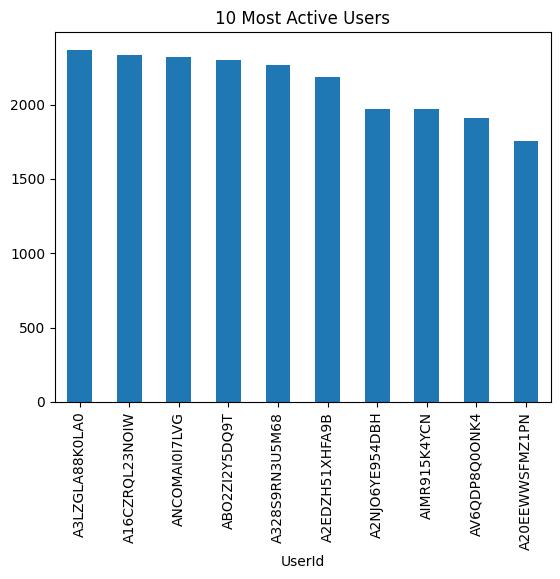

In [5]:
plt.title('10 Most Active Users')
data['UserId'].value_counts(sort=True).nlargest(10).plot.bar()

In [6]:
print('There are', str(data.shape[0]), 'records in total.')

There are 1697533 records in total.


The dataset reveals that the most active user has fewer than 3,000 reviews, which is quite small compared to the dataset's total of over 1 million entries. This suggests that individual users aren’t likely to dominate or heavily influence the overall predictions. Similarly, when examining the "ProductId" column, no single product has more than 3,000 reviews, reinforcing the idea that no single product will disproportionately affect the analysis outcomes.

### Products

<Axes: title={'center': '10 Most Rated Products'}, xlabel='ProductId'>

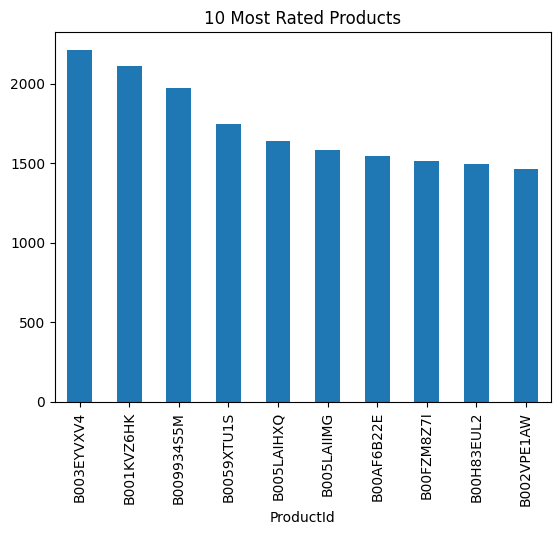

In [7]:
plt.title('10 Most Rated Products')
data['ProductId'].value_counts(sort=True).nlargest(10).plot.bar()

### HelpfulnessNumerator

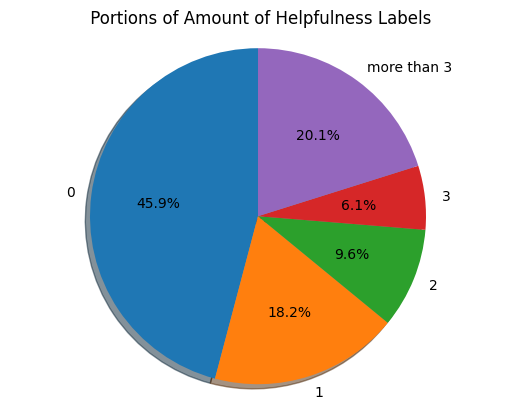

In [8]:
HelpfulnessNumerator0 = data[data['HelpfulnessNumerator'] == 0]['HelpfulnessNumerator'].value_counts()
HelpfulnessNumerator1 = data[data['HelpfulnessNumerator'] == 1]['HelpfulnessNumerator'].value_counts()
HelpfulnessNumerator2 = data[data['HelpfulnessNumerator'] == 2]['HelpfulnessNumerator'].value_counts()
HelpfulnessNumerator3 = data[data['HelpfulnessNumerator'] == 3]['HelpfulnessNumerator'].value_counts()
HelpfulnessNumeratorMoreThan3 = data[data['HelpfulnessNumerator'] > 3]['HelpfulnessNumerator'].value_counts()

labels = '0', '1', '2', '3', 'more than 3'
sizes = [HelpfulnessNumerator0.values.item(), HelpfulnessNumerator1.values.item(), HelpfulnessNumerator2.values.item(), 
         HelpfulnessNumerator3.values.item(), HelpfulnessNumeratorMoreThan3.values.sum()]
explode = (0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(' Portions of Amount of Helpfulness Labels')
plt.show()

### HelpfulnessDenominator

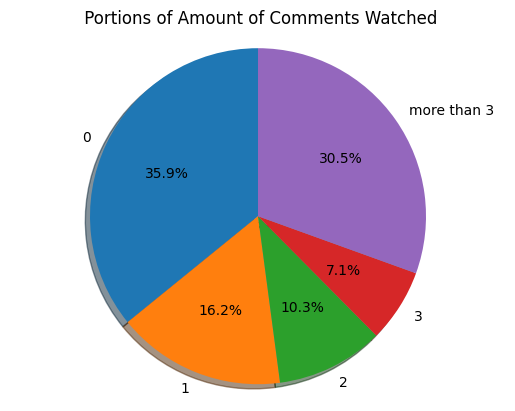

In [9]:
HelpfulnessDenominator0 = data[data['HelpfulnessDenominator'] == 0]['HelpfulnessDenominator'].value_counts()
HelpfulnessDenominator1 = data[data['HelpfulnessDenominator'] == 1]['HelpfulnessDenominator'].value_counts()
HelpfulnessDenominator2 = data[data['HelpfulnessDenominator'] == 2]['HelpfulnessDenominator'].value_counts()
HelpfulnessDenominator3 = data[data['HelpfulnessDenominator'] == 3]['HelpfulnessDenominator'].value_counts()
HelpfulnessDenominatorMoreThan3 = data[data['HelpfulnessDenominator'] > 3]['HelpfulnessDenominator'].value_counts()

labels = '0', '1', '2', '3', 'more than 3'
sizes = [HelpfulnessDenominator0.values.item(), HelpfulnessDenominator1.values.item(), HelpfulnessDenominator2.values.item(), 
         HelpfulnessDenominator3.values.item(), HelpfulnessDenominatorMoreThan3.values.sum()]
explode = (0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(' Portions of Amount of Comments Watched')
plt.show()

In the columns **HelpfulnessNumerator** and **HelpfulnessDenominator**, no single value exceeds 50%. This indicates that none of the values are overwhelmingly dominant, allowing me to conclude that they are unlikely to significantly impact the performance of the predictor.

### Score

<Axes: title={'center': 'Scores'}, xlabel='Score'>

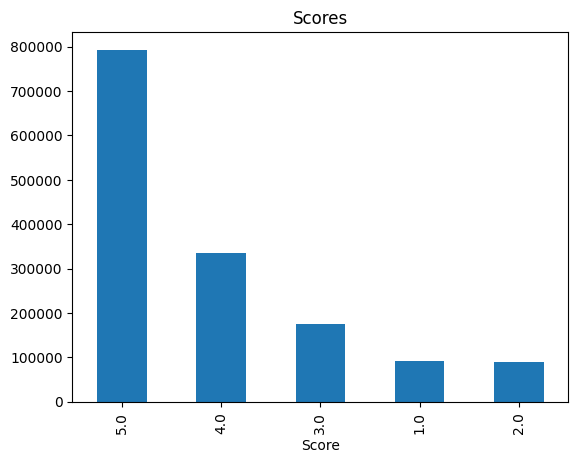

In [10]:
plt.title('Scores')
data['Score'].value_counts().plot.bar()

Commenters tend to favor rating movies **5.0/5.0**. Unlike previous features, this tendency could introduce a potential bias in the machine learning model, leading the classifier to predominantly predict unlabeled movies as **5.0/5.0**. To mitigate this effect, I will take precautions in the subsequent chapters.


### Summary and Text
-----
In this step I plotted out the word cloud images of both "Summary" and "Text", in search of any valuable information.

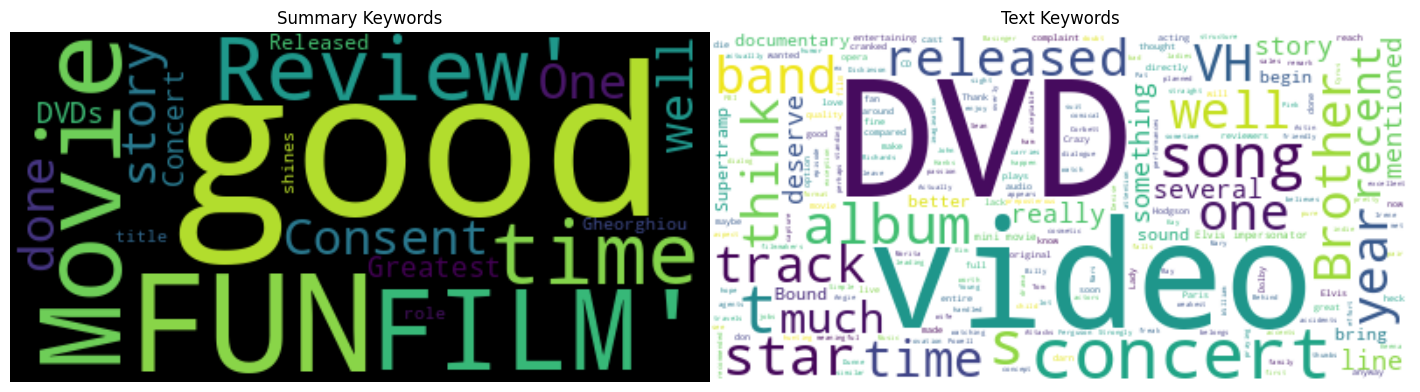

In [11]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(121)
text = data.Summary.values
wordcloud = WordCloud(
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
plt.title('Summary Keywords')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

ax = fig.add_subplot(122)
text = data.Text.values
wordcloud = WordCloud(
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
plt.title('Text Keywords')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

There is minimal overlap between the two word clouds, primarily because the **Summary** is more concise than the **Text**, resulting in less information. However, due to their few commonalities, it is safe to assume that there is no strong correlation between the two. Therefore, I will utilize both as factors in my prediction model.

## Missing Value Detection
-----
As the overview suggests, our dataset contains missing values. Therefore, it is essential to investigate their properties to ensure that they do not cause any distortions in the analysis.


<Axes: >

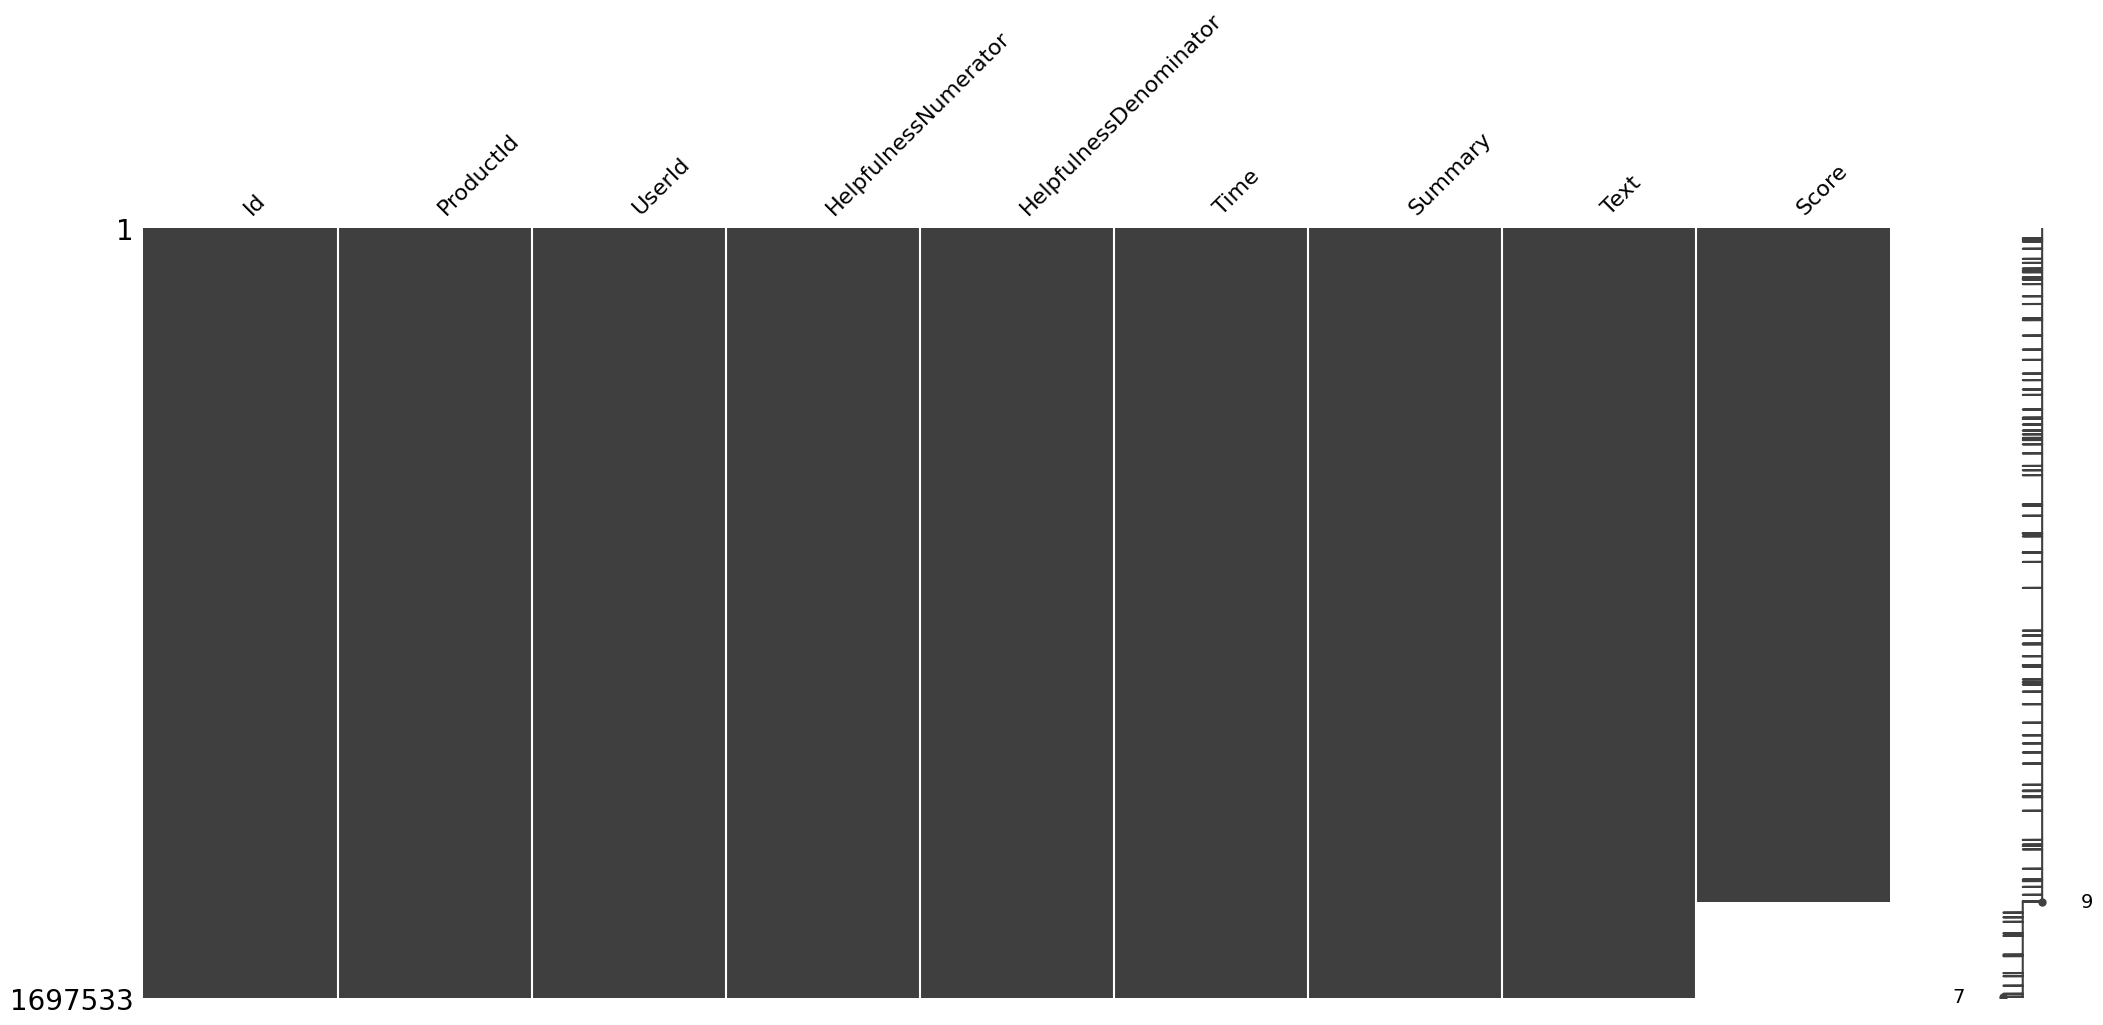

In [12]:
msno.matrix(data) 

Except for "Score" (our target variable for this competition, which contains test data), it appears that there are almost no missing values in the other features. According to the following heatmap, the missing values are limited to the "Summary" and "Text" properties, and there is no strong correlation between them. This simplifies the issue, as I can apply a straightforward imputation method to address the missing values without needing to consider more complex scenarios.


<Axes: >

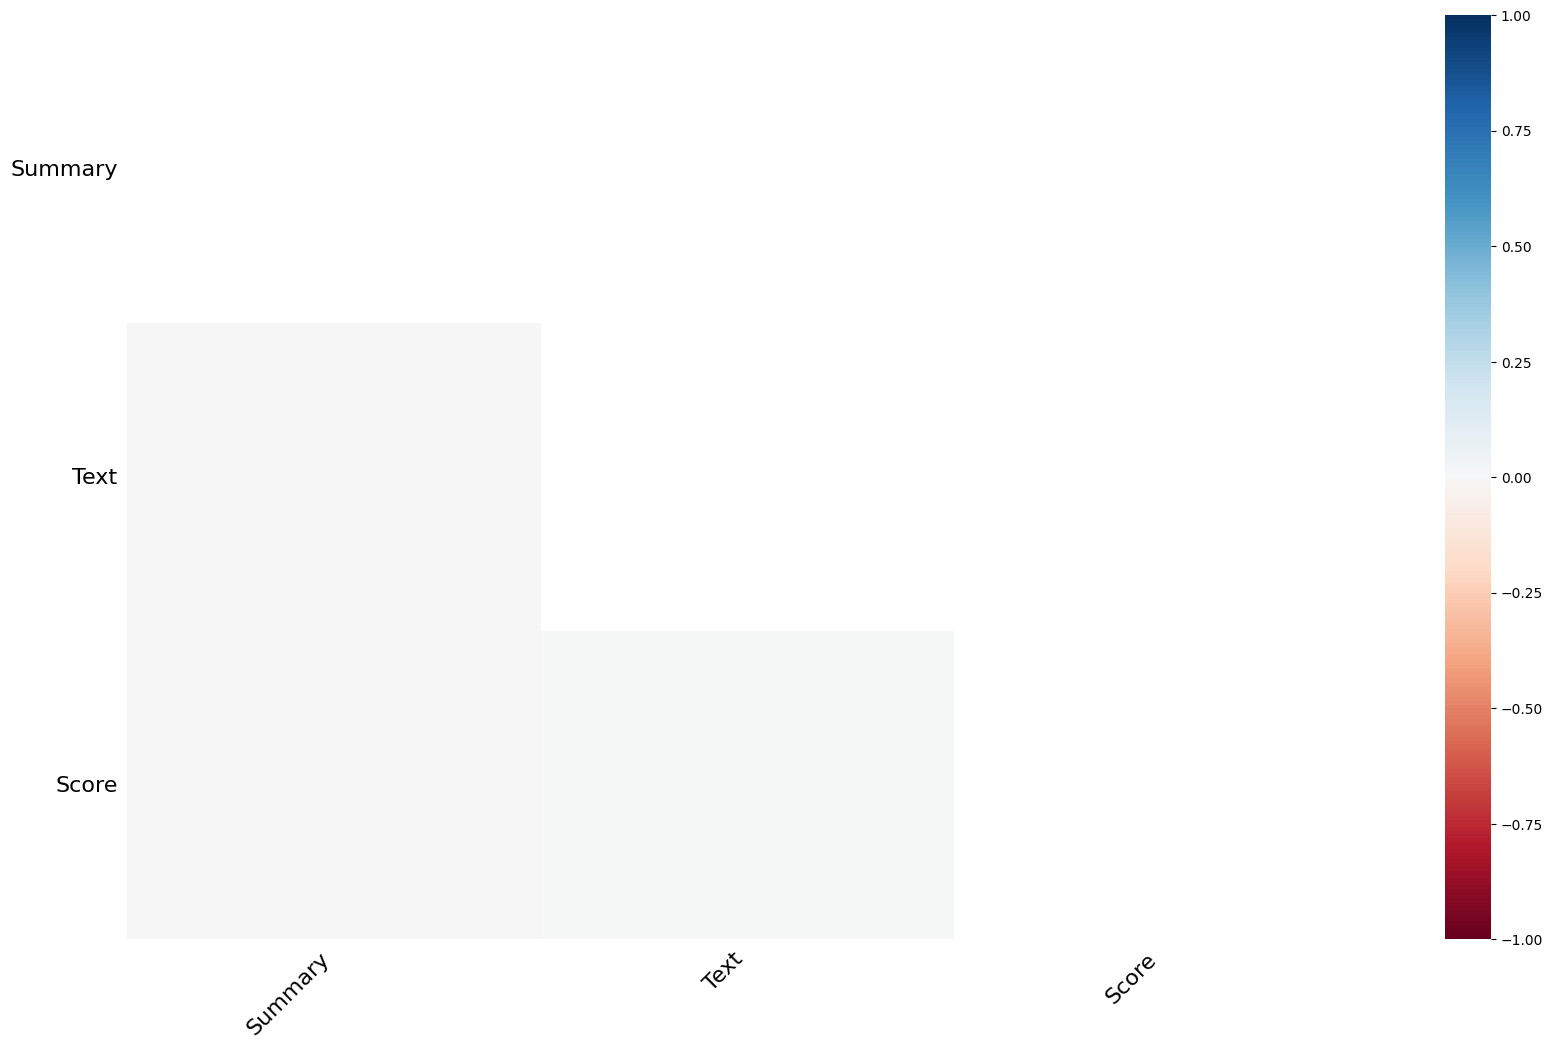

In [13]:
msno.heatmap(data) 

# Data Preprocessing

## Downsize the Data with a Score of 5.0/5.0
------
As previously mentioned, there is an overwhelming number of entries with a score of 5.0/5.0. To prevent the potential side effect of the predictor predominantly assigning this score to unknown records (due to its common occurrence), I will reduce the size of the dataset that contains a score of 5.0/5.0.


In [14]:
# fives = data.loc[data['Score'] == 5]
# fives = fives.sample(frac=0.5)
# data = pd.concat([data.loc[data['Score'] != 5], fives])

## One-hot Encoding of Categorical Features
------
Encoding is a technique used to digitize categorical features. I opted for one-hot encoding instead of label encoding because label encoding assigns a unique value to each identifier based on its order of appearance. This means that identifiers that appear earlier receive smaller values, which can misrepresent their actual significance, as these identifiers are not inherently measurable features.

The primary drawback of one-hot encoding is its higher memory consumption due to the creation of additional binary columns for each category. However, I will demonstrate how to effectively manage this situation.


In [10]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse_output=True)
IDs = OHE.fit_transform(data[['ProductId', 'UserId']])

In [16]:
# # collect the model to reuse later
# from joblib import dump, load
# dump(ID_fitter, 'OHE.joblib') 

## Impute Missing Values by Replacing Blanks with Void Strings
-----
This approach is the simplest form of imputation. By replacing missing values with empty strings, we can ensure that our dataset remains consistent and can be processed without errors.


In [11]:
data['Text'].loc[data['Text'].isna()] = ''
data['Summary'].loc[data['Summary'].isna()] = ''

## Standardize the numerical features
-----
Standardization helps to reduce the influence of outliers and converge faster.

In [12]:
data['Helpful'] = data['HelpfulnessNumerator']
data['Unhelpful'] = data['HelpfulnessDenominator'] - data['HelpfulnessNumerator']
scaler = StandardScaler()
scalerFitter = scaler.fit(data[['Helpful', 'Unhelpful', 'Time']])
data[['Helpful', 'Unhelpful', 'Time']] = scalerFitter.transform(data[['Helpful', 'Unhelpful', 'Time']])
data = data.drop(['HelpfulnessDenominator','HelpfulnessNumerator'], axis=1)

In [19]:
# dump(scalerFitter, 'scaler.joblib')

## Calculate TF-IDF and Vectorize
-----
This step serves as the baseline for our analysis. By vectorizing the text values using the Term Frequency-Inverse Document Frequency (TF-IDF) method, we can extract more meaningful information from the dataset, ultimately enhancing the accuracy of our predictions.


In [13]:
text_vectorizer = TfidfVectorizer(input='content', analyzer='word', stop_words='english')
summary_vectorizer = TfidfVectorizer(input='content', analyzer='word', stop_words='english')
text_fitter = text_vectorizer.fit(data['Text'])
text_matrix = text_fitter.transform(data['Text'])
summary_fitter = summary_vectorizer.fit(data['Summary'])
summary_matrix = summary_fitter.transform(data['Summary'])

In [21]:
# dump(text_fitter, 'text.joblib')
# dump(summary_fitter, 'summary.joblib')

In [14]:
text_matrix, summary_matrix

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 106052355 stored elements and shape (1697533, 815347)>,
 <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 4887917 stored elements and shape (1697533, 101440)>)

## Concatenate all the features

### make dense series to a sparse matrix

In [15]:
numerical = scipy.sparse.csr_matrix(data[['Helpful', 'Unhelpful', 'Time']].values)

### stack all the sparse matrices above acording to their row indices
----
Sparse matrix helps solve the memory consuming trouble of the one-hot encoding.

In [16]:
X = hstack([text_matrix, summary_matrix, numerical, IDs])

### split out the train set and test set

#### input columns

In [17]:
mask = data["Score"].isnull()

ind_test = mask.to_numpy().nonzero()[0]
ind_train = (~ mask).to_numpy().nonzero()[0]

train_X = scipy.sparse.csr_matrix(X)[ind_train]
test_X = scipy.sparse.csr_matrix(X)[ind_test]

This is a visualization of my sparse matrix. However, even if it is called "Sparse", it is not sparse at all from the perspective of maths because the elements within the matrix are barely zero.

In [26]:
# plt.spy(train_X)

#### output

In [18]:
train_Y = data['Score'].loc[data['Score'].isna() == False]
test_Y = data['Score'].loc[data['Score'].isna()]

train_Y = train_Y.reset_index()['Score']
test_Y = test_Y.reset_index()['Score']

## Random Oversampling

In [19]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
train_X, train_Y = ros.fit_resample(train_X, train_Y)

<Axes: title={'center': 'Scores'}, xlabel='Score'>

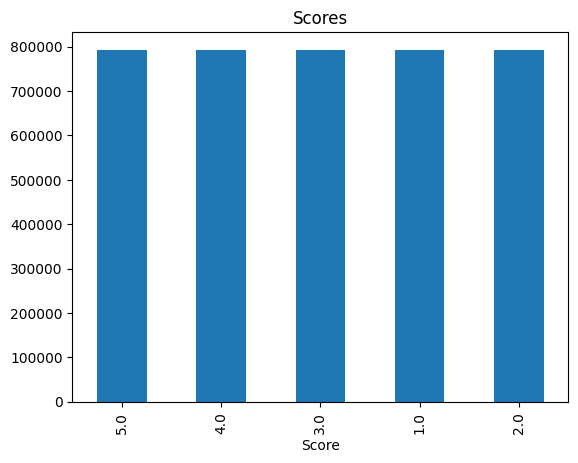

In [29]:
plt.title('Scores')
train_Y.value_counts().plot.bar()

### Separate a ratio of train set for the use of validation

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2, random_state=42)

## Implement the classifier
---
I chose Logistics regression as my model because of its efficiency and am going to check its accuracy with K-fold cross validation

In [21]:
def CVKFold(k, X, y, model):
    np.random.seed(1)
    #reproducibility
    
    highest_accuracy = float('inf')
    best_model = None

    kf = KFold(n_splits = k,shuffle =True)
    #CV loop
    
    for train_index,test_index in kf.split(X):#generation of the sets
    #generate the sets    
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #model fitting
        model.fit(X_train,y_train)
        y_test_pred = model.predict(X_test)
    
        test_accuracy = mean_squared_error(y_test_pred, y_test)
        print("The accuracy is " + str(test_accuracy))
        if test_accuracy < highest_accuracy:
          best_model = model
          highest_accuracy = test_accuracy

    print("The highest accuracy is " + str(highest_accuracy))
    return best_model, highest_accuracy

In [32]:
# model = LogisticRegression(random_state = 0)
# model = model.fit(train_X, train_Y)
# dump(model, 'model.joblib')

In [22]:
# Logistics Regression
model = LogisticRegression(random_state = 0)
model = model.fit(train_X, train_Y)
# dump(model, 'model.joblib')
clf_Log, accuracy_Log = CVKFold(2, train_X, train_Y, model)
# Decision Tree
# model = DecisionTreeClassifier(random_state = 0, max_depth=20)
# clf_DTree, accuracy_DTree = CVKFold(5, train_X, train_Y, model)
# Random Forest
# model = RandomForestClassifier(random_state = 0, max_depth=20)
# clf_RF, accuracy_RF = CVKFold(1, train_X, train_Y, model)

The accuracy is 0.7467446800355841
The accuracy is 0.7488752624303611
The highest accuracy is 0.7467446800355841


In [ ]:
accuracies = {accuracy_Log: clf_Log, accuracy_DTree: clf_DTree, accuracy_RF: clf_RF}
clf = accuracies[min([accuracy_Log, accuracy_DTree, accuracy_RF])]

NameError: name 'accuracy_Log' is not defined

In [23]:
accuracies = {accuracy_Log: clf_Log}
clf = accuracies[min([accuracy_Log])]

## predict the output results on the test set


In [24]:
sample = pd.read_csv('data/sample.csv')
predict_df = pd.DataFrame(sample)

predict_df['Score'] = model.predict(test_X)
predict_df.to_csv(r'submission_15.csv',index=False)